**Below is the steps we would go through to load, view and visualize any json data.**  
  
**STEP 1: ADDING PACKAGES**  
  
**We add python packages we require.**  

In [1]:
import ijson                    # required to extract data from json format
import numpy  as np             # easy to play with arrays etc.
import pandas as pd             # required to load and read data and put in dataframe.
import matplotlib.pyplot as plt # required for data visualization purposes.
import seaborn as sns           # required for data visualization purposes.
import plotly.plotly as py      # required for data visualization purposes.
import plotly.graph_objs as go  # required for data visualization purposes.
from IPython.display import display, HTML
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

**STEP 2: READING IN A DATASET**  
  
**To read data in the form of .json, you need ijson.items()**  
**This time the parameter we use is meta.view.columns.item**

**Most json files use a similar structure therefore the code looks pretty similar for any json data**  

**https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-women-infant-and-child-dfe5d is source of data**  

In [2]:
filename = "../data/healthdata.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)
column_names = [col["fieldName"] for col in columns]
print column_names

[u':sid', u':id', u':position', u':created_at', u':created_meta', u':updated_at', u':updated_meta', u':meta', u'yearstart', u'yearend', u'locationabbr', u'locationdesc', u'datasource', u'class', u'topic', u'question', u'data_value_unit', u'data_value_type', u'data_value', u'data_value_alt', u'data_value_footnote_symbol', u'data_value_footnote', u'low_confidence_limit', u'high_confidence_limit', u'sample_size', u'total', u'age_months', u'gender', u'race_ethnicity', u'geolocation', u'classid', u'topicid', u'questionid', u'datavaluetypeid', u'locationid', u'stratificationcategory1', u'stratification1', u'stratificationcategoryid1', u'stratificationid1']


**STEP 3: DECIDING WHICH COLUMNS MATTER**  
  

**There are several columns with data that is either not required or has ':' symbols. Essentially we make a list of the columns we want and discard the rest**

In [3]:
final_columns=[u'yearstart', u'locationabbr', u'data_value', u'low_confidence_limit', u'high_confidence_limit', u'sample_size', u'stratificationcategory1', u'stratification1']

**STEP 4: EXTRACT DATA FROM EACH SELECTED COLUMN**  
  
**Once again to get the data for each column we use ijson.items()**
**This time the parameter we use is .item**

In [4]:
data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in final_columns:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)
print data[9]

[u'2008', u'AL', u'25.0', u'19.3', u'30.7', u'228', u'Race/Ethnicity', u'American Indian/Alaska Native']


**STEP 5: PUTTING THE DATA IN A PANDAS DATAFRAME**  
  

**We use pd.DataFrame() to put the data we extracted into a pandas df format**

In [5]:
data = pd.DataFrame(data, columns=final_columns)

**STEP 6: VIEWING THE FIRST FEW ROWS**  
  

**To see the first few rows of the data and make sure we read it in correctly, we use .head()**


In [6]:
data.head(15)

,yearstart,locationabbr,data_value,low_confidence_limit,high_confidence_limit,sample_size,stratificationcategory1,stratification1
0,2008,AL,15.4,15.1,15.8,43287,Total,Total
1,2008,AL,15.5,15.0,16.0,21912,Gender,Male
2,2008,AL,15.3,14.9,15.8,21375,Gender,Female
3,2008,AL,15.3,14.7,15.8,18219,Age (months),24 - 35
4,2008,AL,14.9,14.4,15.5,14796,Age (months),36 - 47
5,2008,AL,16.4,15.6,17.1,10272,Age (months),48 - 59
6,2008,AL,15.8,15.2,16.3,17833,Race/Ethnicity,Non-Hispanic White
7,2008,AL,13.9,13.4,14.4,19170,Race/Ethnicity,Non-Hispanic Black
8,2008,AL,19.3,18.3,20.3,5731,Race/Ethnicity,Hispanic
9,2008,AL,25.0,19.3,30.7,228,Race/Ethnicity,American Indian/Alaska Native


**STEP 7: GET BASIC INFORMATION**  
  
**To get basic info from the dataset, we use .info()**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 8 columns):
yearstart                  7344 non-null object
locationabbr               7344 non-null object
data_value                 7153 non-null object
low_confidence_limit       7153 non-null object
high_confidence_limit      7153 non-null object
sample_size                7153 non-null object
stratificationcategory1    7344 non-null object
stratification1            7344 non-null object
dtypes: object(8)
memory usage: 459.1+ KB


**STEP 8: SEE FURTHER DETAILS**  
  
**To get datatypes of each column, we can use .dtypes**  

**To get more details about each column, we can use .describe()**  
  
The reason we only get data from 3 columns is because the rest have commas in them which need to be removed
We can deal with this later while cleaning.

In [8]:
print data.dtypes
print "\n"
display(HTML(data.describe().to_html()))

yearstart                  object
locationabbr               object
data_value                 object
low_confidence_limit       object
high_confidence_limit      object
sample_size                object
stratificationcategory1    object
stratification1            object
dtype: object




,yearstart,locationabbr,data_value,low_confidence_limit,high_confidence_limit,sample_size,stratificationcategory1,stratification1
count,7344,7344,7153,7153,7153,7153,7344,7344
unique,4,54,247,251,284,4190,4,15
top,2008,AZ,16.0,15.7,16.3,72,Race/Ethnicity,Non-Hispanic White
freq,1836,136,105,93,117,12,3240,648


**STEP 6: COUNT NUMBER OF EMPTY VALUES IN COLUMN**  
   
**We can check the number of null values a column has by using .isnull().sum()**  
  
**For example, here, Climate has the most null values **  

In [9]:
print data.isnull().sum()

yearstart                    0
locationabbr                 0
data_value                 191
low_confidence_limit       191
high_confidence_limit      191
sample_size                191
stratificationcategory1      0
stratification1              0
dtype: int64


**STEP 7: SEE NUMBER OF UNIQUE VALUES IN COLUMN**  
  
**It is useful to see the number of unique values in each column using .nunique()**  
  
**Here we see region and climate have a good number of unique values to order by, therefore we can group by these columns and make good visualizations**  

In [10]:
print data.nunique()

yearstart                     4
locationabbr                 54
data_value                  247
low_confidence_limit        251
high_confidence_limit       284
sample_size                4190
stratificationcategory1       4
stratification1              15
dtype: int64


**STEP 9: NUMBER OF OCCURANCES OF EACH VALUE IN COLUMN**  
  
**A good way to visualize data of a column you wish to group by is to use .value_counts()**  
  
**It gives a clear picture of how many would be in each group etc.** 

In [11]:
stratifications = data.stratificationcategory1.value_counts()
print stratifications
stratifications1 = data.stratification1.value_counts()
print stratifications1
locations = data.locationabbr.value_counts()
print locations.head(15)

Race/Ethnicity    3240
Age (months)      2160
Gender            1296
Total              648
Name: stratificationcategory1, dtype: int64
Non-Hispanic White               648
Hispanic                         648
Male                             648
Total                            648
Asian/Pacific Islander           648
American Indian/Alaska Native    648
Female                           648
Non-Hispanic Black               648
36 - 47                          432
48 - 59                          432
24 - 35                          432
12 - 17                          216
6 - 11                           216
18 - 23                          216
3 - 5                            216
Name: stratification1, dtype: int64
AZ    136
MI    136
VI    136
VA    136
LA    136
SD    136
SC    136
CT    136
CA    136
CO    136
FL    136
MS    136
MT    136
MN    136
AR    136
Name: locationabbr, dtype: int64


**STEP 10: CLEANING DATA**  
  
**To see more from the data it has to be cleaned. Cleaning data is usally unique to each dataset.**  

**In this instance, we change column dtypes **

In [12]:
for i in data.columns:
    if i== 'locationabbr' or i=='stratificationcategory1' or i=='stratification1':        
        data[i] = data[i].str.strip().astype('category')
    else:
        data[i] = data[i].astype(float)

**Now after cleaning, lets look at the new data types and the mean, std, min, max etc. of all the columns again**

In [13]:
print data.dtypes
print "\n"
display(HTML(data.describe().to_html()))

yearstart                   float64
locationabbr               category
data_value                  float64
low_confidence_limit        float64
high_confidence_limit       float64
sample_size                 float64
stratificationcategory1    category
stratification1            category
dtype: object




,yearstart,data_value,low_confidence_limit,high_confidence_limit,sample_size
count,7344.00000,7153.000000,7153.000000,7153.000000,7153.000000
mean,2011.00000,14.249490,12.872571,15.627387,19027.823571
std,2.23622,3.737871,4.065295,4.057627,41023.632114
min,2008.00000,1.500000,0.000000,3.700000,50.000000
25%,2009.50000,11.900000,10.500000,13.100000,1816.000000
50%,2011.00000,14.400000,13.300000,15.500000,7968.000000
75%,2012.50000,16.500000,15.600000,17.600000,20861.000000
max,2014.00000,36.100000,34.500000,37.700000,620016.000000


**STEP 11: PLOT WHOLE DATESET**  
  
**Let us try to visualize all the data at once**  

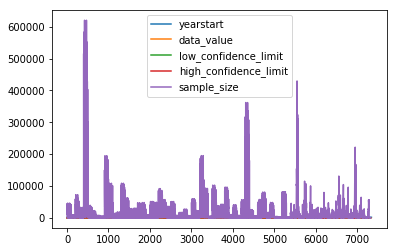

In [14]:
a = data.plot()
plt.show()

**STEP 12: REARRANGING DATA**  
  
**Given that the data we are using is structured differently. It would make sense to group data by the location and the startification.**
**Therefore we create three new dataframes each with one value:low_confidence_limit, data_value, high_confidence_limit **
**This makes it easier to visualize and analyze the data**

In [15]:
grouped1 = data.groupby(["locationabbr","stratificationcategory1"])
new_data= grouped1['low_confidence_limit'].agg(np.mean)
print new_data
new_data = new_data.unstack(level=-1)
display(HTML(new_data.head(15).to_html()))


grouped3 = data.groupby(["locationabbr","stratificationcategory1"])
new_data3= grouped3['data_value'].agg(np.mean)
data_rearranged = new_data3.unstack(level=-1)

grouped2 = data.groupby(["locationabbr","stratificationcategory1"])
new_data2= grouped2['high_confidence_limit'].agg(np.mean)   
new_data2 = new_data2.unstack(level=-1)

locationabbr  stratificationcategory1
AK            Age (months)               15.872500
              Gender                     17.254167
              Race/Ethnicity             15.101667
              Total                      17.666667
AL            Age (months)               14.000000
              Gender                     14.404167
              Race/Ethnicity             12.921667
              Total                      14.558333
AR            Age (months)               11.882500
              Gender                     13.275000
              Race/Ethnicity             11.760000
              Total                      13.441667
AZ            Age (months)               13.897500
              Gender                     14.558333
              Race/Ethnicity             13.148333
              Total                      14.675000
CA            Age (months)               16.297500
              Gender                     16.620833
              Race/Ethnicity             14.

stratificationcategory1,Age (months),Gender,Race/Ethnicity,Total
locationabbr,,,,
AK,15.8725,17.254167,15.101667,17.666667
AL,14.0000,14.404167,12.921667,14.558333
AR,11.8825,13.275000,11.760000,13.441667
AZ,13.8975,14.558333,13.148333,14.675000
CA,16.2975,16.620833,14.066667,16.675000
CO,9.1500,9.720833,8.100000,9.858333
CT,12.8200,13.675000,10.470000,13.908333
DC,10.8075,12.179167,9.797826,12.600000
DE,13.7425,14.825000,12.033333,15.200000


**STEP 13: HEATMAP OF CORRELATION BETWEEN COLUMNS**  
  
**When two sets of data are strongly linked together we say they have a High Correlation. To see corr between all the columns, we use .corr()**

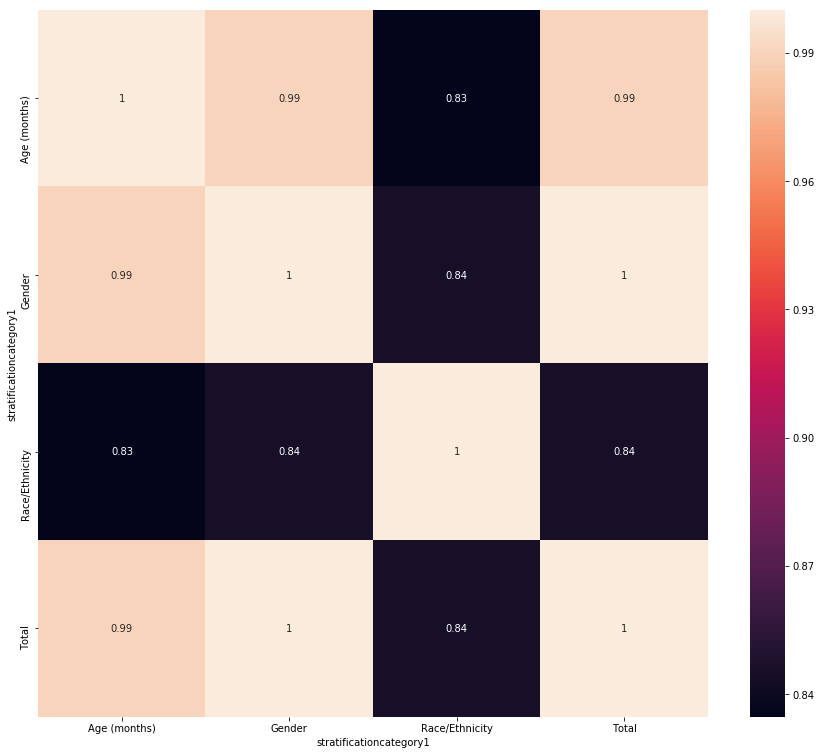

In [16]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(data_rearranged.corr(), annot=True, ax=ax)
plt.show()

**STEP 14: COMPLEX VISUALIZATION**  
  
**Next we want to be able to make more complex visualizations to better understand code** 
  
**To start with, lets use plotly.graph_objs to visualize data on a USA map.**  
   
This can be repeated for the other dataframes.

In [17]:
data2 = dict(
        type='choropleth',
        locations = list(data_rearranged.index),
        z = data_rearranged.Total,
        locationmode = 'USA-states',
        text = list(data_rearranged.index),colorbar = {'title':'Total Obesity Value', 'tickmode' : 'array',},
    )

layout = dict(title='Location Projections',
    geo = dict(projection={'type':'albers usa'}))
    
fig = dict( data=[data2], layout=layout )
iplot( fig )

**STEP 15: MORE VISUALIZATION**  
  
**Box plots are another good way to visualize data. Here, each of our new dataframes have similar data. It is convenient to be able to plot them next to each other. Once again we use plotly.graph_objs for this**

In [18]:
trace0 = go.Box(
    y = new_data.Total,
    name = "low_confidence_limit",
    boxpoints='all',
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(0, 255, 0, 0.8)')
    )

trace1 = go.Box(
    y = data_rearranged.Total,
    boxpoints='all',
    name = "data_value",
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(255, 0, 0, 0.8)')
    )

trace2 = go.Box(
    y = new_data2.Total,
    boxpoints='all',
    name = "high_confidence_limit",
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(0, 0, 255, 0.8)')
    )

plotdata = go.Figure(data = [trace0,trace1,trace2])
iplot(plotdata)